In [107]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
import numpy as np

In [126]:
d = pd.read_csv(r"neuralData_MBLU-8.csv")

In [127]:
data = d.dropna()
allGoodCol = data.columns
allGoodCol = list(allGoodCol)
allGoodCol = allGoodCol[2::]

In [128]:
data

,x,lap,speed,c1,c2,c3,c4,c5,c6,c7,...,c155,c156,c157,c158,c159,c160,c161,c162,c163,c164
0,188.708087,0,6.223696,0,0.0,2.519697,1.493450,2.135224,0.0,1.755799,...,0.646821,0.0,0.0,0.0,0.353179,0.0,0.0,0.0,0.0,2.444009
1,188.637071,0,6.223696,0,0.0,3.316837,2.457109,2.641774,0.0,1.542891,...,0.298690,0.0,0.0,0.0,0.542891,0.0,0.0,0.0,0.0,2.480303
2,186.965725,0,6.223696,0,0.0,3.324937,3.239154,2.054489,0.0,1.511597,...,0.054489,0.0,0.0,0.0,0.805240,0.0,0.0,0.0,0.0,2.678115
3,187.741618,0,9.594457,0,0.0,2.919265,3.353179,1.547939,0.0,1.433914,...,0.000000,0.0,0.0,0.0,0.488403,0.0,0.0,0.0,0.0,3.082731
4,187.207296,0,17.239921,0,0.0,2.732604,3.597380,1.914217,0.0,1.376373,...,0.000000,0.0,0.0,0.0,0.108977,0.0,0.0,0.0,0.0,4.275495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,5.157133,48,9.488135,0,0.0,0.597380,0.054489,0.054489,0.0,0.054489,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.244201
3743,5.009952,48,8.003432,0,0.0,1.049441,0.000000,0.298690,0.0,0.298690,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.566086
3744,5.009952,48,7.523311,0,0.0,0.945511,0.108977,0.864776,0.0,0.755799,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.358226
3745,4.755673,48,6.064245,0,0.0,0.597380,0.488403,1.732604,0.0,1.135224,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.971758


In [129]:
reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding = reducer.fit_transform(parsedData)
embedding.shape

(3747, 3)

In [130]:
df = pd.DataFrame(embedding, columns=['x1', 'x2', 'x3'])
df["x"] = data.x
df["lap"] = data.lap

In [131]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='x', opacity=0.9)

fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [132]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='lap', opacity=0.9)

fig.update_traces(marker_size=1.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Labeled UMAP by lap number

In [133]:
reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding = reducer.fit_transform(parsedData, y = data.lap)
embedding.shape

(3747, 3)

In [134]:
df = pd.DataFrame(embedding, columns=['x1', 'x2', 'x3'])
df["x"] = data.x
df["lap"] = data.lap

In [135]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='x', opacity=0.9)

fig.update_traces(marker_size=1.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [136]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='lap', opacity=0.9)

fig.update_traces(marker_size=1.3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Get the quantity of energy spent per lap

#### This is a lap by lap analysis

In [137]:
spikePerS = [(sum(sum(parsedData[data.lap == i]))/len(allGoodCol))/len(data[data.lap == i]) for i in range(0, max(data.lap) + 1)]
spikePerS = [spikePerS[i]*10 for i in range(0, len(spikePerS))]

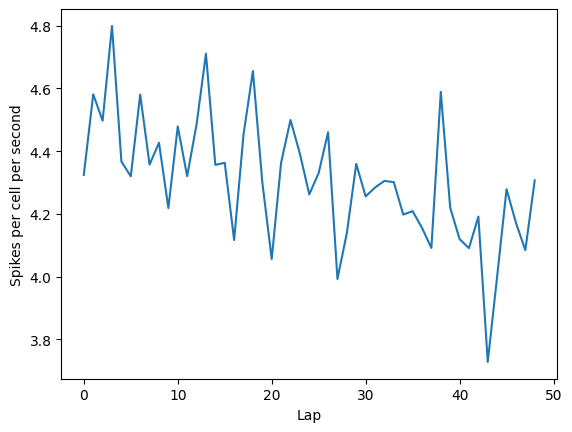

In [138]:
plt.plot(range(0, max(data.lap) + 1), spikePerS)
plt.xlabel("Lap")
plt.ylabel("Spikes per cell per second")
plt.show()

#### Is this dynamic coherent with foldings / unfoldings of the manifold ?

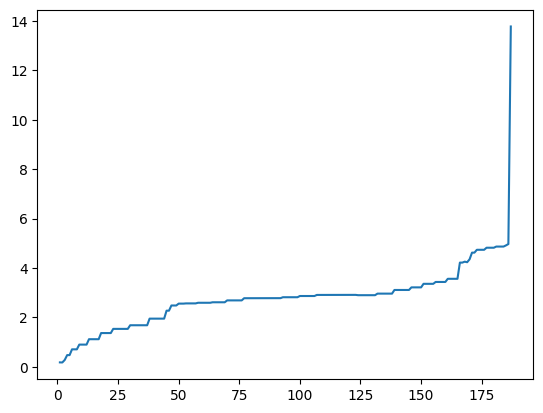

In [207]:
# To calculate the curvature of the embedding, we take the distance of points from the beggening of the track.
# Should be a sin if the embedding is a circle, a monotonic function if the embedding is a line.

# Take the distance with the neighboring 10 points

dataLap = df[df["lap"] == 9]
positions = dataLap["x"].values

# Middle point is the median of the position
start_point = int(min(positions))

corrdVec = []
disVec = []

dataLap = dataLap.reset_index(drop=True)


for incr in range(1, int(max(positions) - start_point) + 1):
    indexLeft = (dataLap["x"] - (start_point + incr)).abs().idxmin()
    indexRight = (dataLap["x"] - (start_point - incr)).abs().idxmin()

    dataLap.iloc[indexLeft]

    # Calculate the distance between the two points
    leftPoint = dataLap.iloc[indexLeft][["x1", "x2", "x3"]].values.T
    rightPoint = dataLap.iloc[indexRight][["x1", "x2", "x3"]].values.T

    distance = np.linalg.norm(leftPoint - rightPoint)

    corrdVec.append(incr)
    disVec.append(distance)

plt.plot(corrdVec, disVec)





In [208]:
middle_point

94

ValueError: x and y must have same first dimension, but have shapes (49,) and (48,)

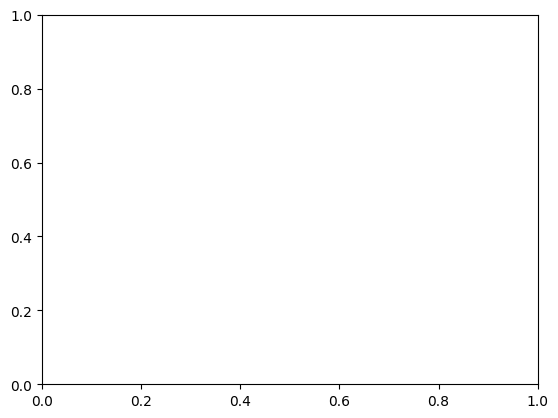

In [209]:
curve = []

for i in range(1, max(data.lap) + 1):
    dataLap = df[df.lap == i]
    maxPoint = dataLap[dataLap["x"] == dataLap["x"].max()].head(1)[["x1", "x2", "x3"]].values.T
    minPoint = dataLap[dataLap["x"] == dataLap["x"].min()].head(1)[["x1", "x2", "x3"]].values.T


    euclDist = np.linalg.norm(maxPoint - minPoint)
    curve.append(euclDist)

plt.plot(range(0, max(data.lap) + 1), curve)
plt.xlabel("Lap")
plt.ylabel("Distabnce between max and min point")




[[ 1.         -0.32176602]
 [-0.32176602  1.        ]]


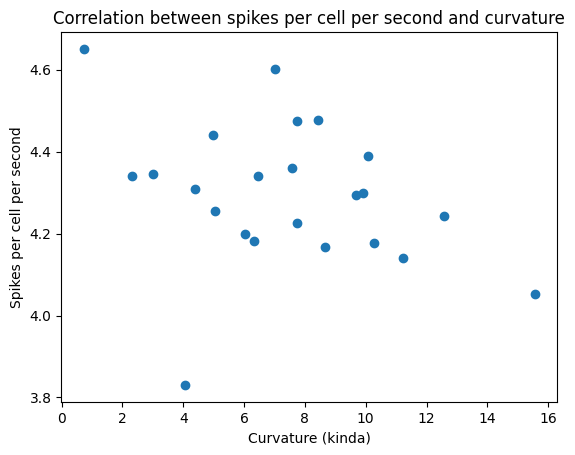

In [ ]:
print(np.corrcoef(spikePerS, curve))
# Always negative for the re-exposure
# And positive for the first exposure

plt.scatter(curve, spikePerS)
plt.title("Correlation between spikes per cell per second and curvature")
plt.xlabel("Curvature (kinda)")
plt.ylabel("Spikes per cell per second")
plt.show()